In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
booking = pd.read_csv("/Users/rikky/Downloads/machine/booking.csv")
# Make index start from 1 instead of 0 & drop the old index
booking.drop(["Booking_ID"], axis=1, inplace=True)
booking.index = booking.index + 1
print(booking.shape)
booking.head()

(36285, 16)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [43]:
profile = ProfileReport(booking, title="Pandas Profiling Report")


In [37]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [38]:
booking.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [39]:
booking.nunique()

number of adults               5
number of children             6
number of weekend nights       8
number of week nights         18
type of meal                   4
car parking space              2
room type                      7
lead time                    352
market segment type            5
repeated                       2
P-C                            9
P-not-C                       59
average price               3930
special requests               6
date of reservation          553
booking status                 2
dtype: int64

In [40]:
print(booking.isnull().sum().sort_values(ascending=False))

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


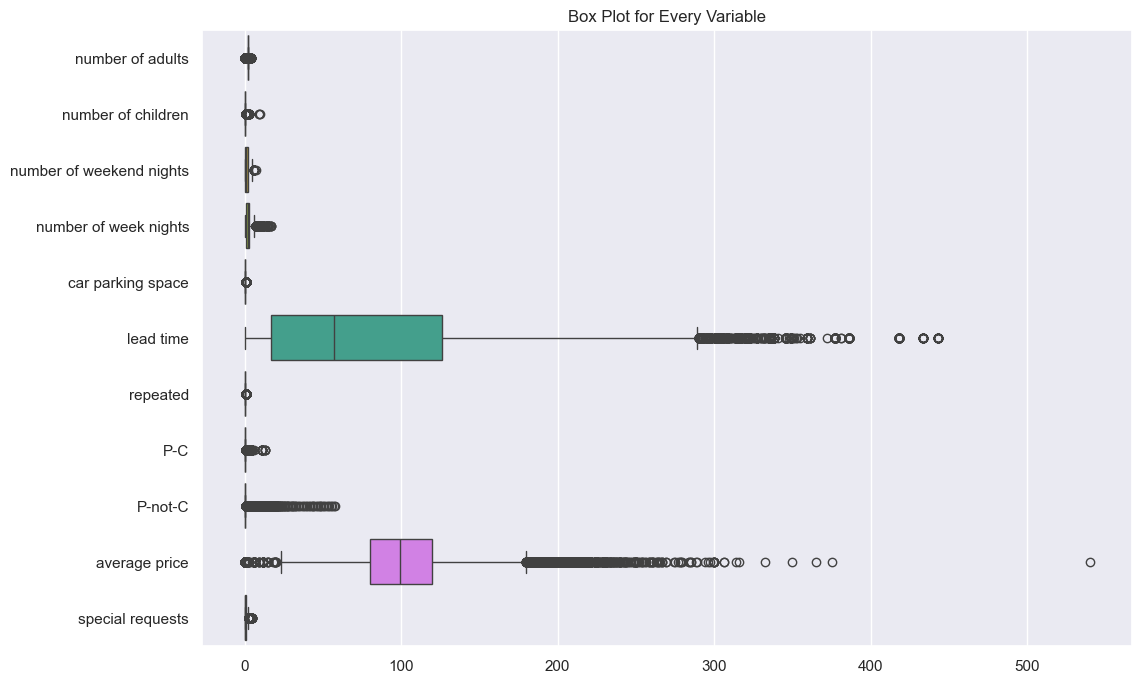

(36285, 16)


In [41]:


# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)



In [11]:
outliers_cols = ["lead time", "average price"]
for column in outliers_cols:
    if booking[column].dtype in ["int64", "float64"]:
        q1 = booking[column].quantile(0.25)
        q3 = booking[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        booking = booking[
            (booking[column] >= lower_bound) & (booking[column] <= upper_bound)
        ]



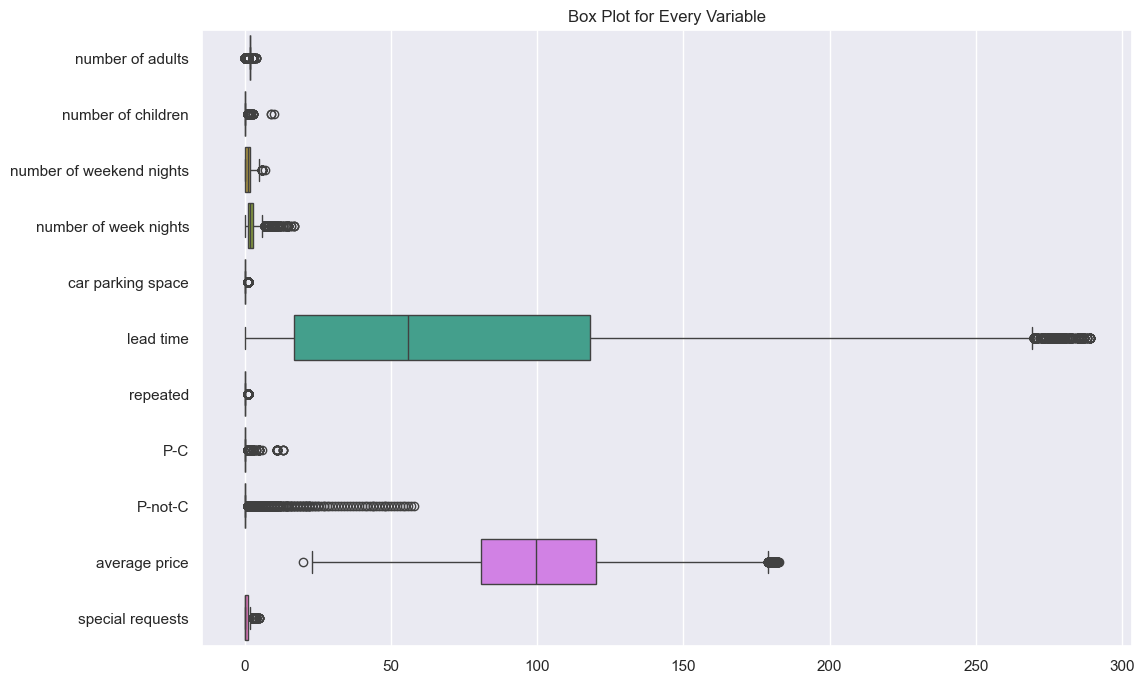

(33345, 16)


In [12]:
# Create box plots for every variable after dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
booking_boxplot = sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)



In [13]:
booking["booking status"] = booking["booking status"].replace("Canceled", 1)
booking["booking status"] = booking["booking status"].replace("Not_Canceled", 0)
booking.head()



/var/folders/vx/x8bgtghs1719gbr0r4xy3t5r0000gn/T/ipykernel_2861/1036095279.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  booking["booking status"] = booking["booking status"].replace("Not_Canceled", 0)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,0
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,0
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,1
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,1
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,1


In [14]:
booking = booking[~booking["date of reservation"].str.contains("-")]
booking["date of reservation"] = pd.to_datetime(booking["date of reservation"])

booking["day"] = booking["date of reservation"].dt.day
booking["month"] = booking["date of reservation"].dt.month
booking["year"] = booking["date of reservation"].dt.year

# Drop the original datetime column
booking = booking.drop(columns=["date of reservation"])
booking.info()



<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 1 to 36285
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          33312 non-null  int64  
 1   number of children        33312 non-null  int64  
 2   number of weekend nights  33312 non-null  int64  
 3   number of week nights     33312 non-null  int64  
 4   type of meal              33312 non-null  object 
 5   car parking space         33312 non-null  int64  
 6   room type                 33312 non-null  object 
 7   lead time                 33312 non-null  int64  
 8   market segment type       33312 non-null  object 
 9   repeated                  33312 non-null  int64  
 10  P-C                       33312 non-null  int64  
 11  P-not-C                   33312 non-null  int64  
 12  average price             33312 non-null  float64
 13  special requests          33312 non-null  int64  
 14  booking sta

In [15]:
booking["average price"] = booking["average price"].round().astype(int)

In [16]:
object_columns = booking.select_dtypes(include=["object"]).columns
booking = pd.get_dummies(booking, columns=object_columns)
booking = booking.replace({True: 1, False: 0})
booking.info()


/var/folders/vx/x8bgtghs1719gbr0r4xy3t5r0000gn/T/ipykernel_2861/849980471.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  booking = booking.replace({True: 1, False: 0})


<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 1 to 36285
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   33312 non-null  int64
 1   number of children                 33312 non-null  int64
 2   number of weekend nights           33312 non-null  int64
 3   number of week nights              33312 non-null  int64
 4   car parking space                  33312 non-null  int64
 5   lead time                          33312 non-null  int64
 6   repeated                           33312 non-null  int64
 7   P-C                                33312 non-null  int64
 8   P-not-C                            33312 non-null  int64
 9   average price                      33312 non-null  int64
 10  special requests                   33312 non-null  int64
 11  booking status                     33312 non-null  int64
 12  day                    

In [17]:
booking.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
1,1,1,2,5,0,224,0,0,0,88,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,3,0,5,0,0,0,107,...,0,0,0,0,0,0,0,0,0,1
3,2,1,1,3,0,1,0,0,0,50,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,2,0,211,0,0,0,100,...,0,0,0,0,0,0,0,0,0,1
5,1,0,1,2,0,48,0,0,0,77,...,0,0,0,0,0,0,0,0,0,1


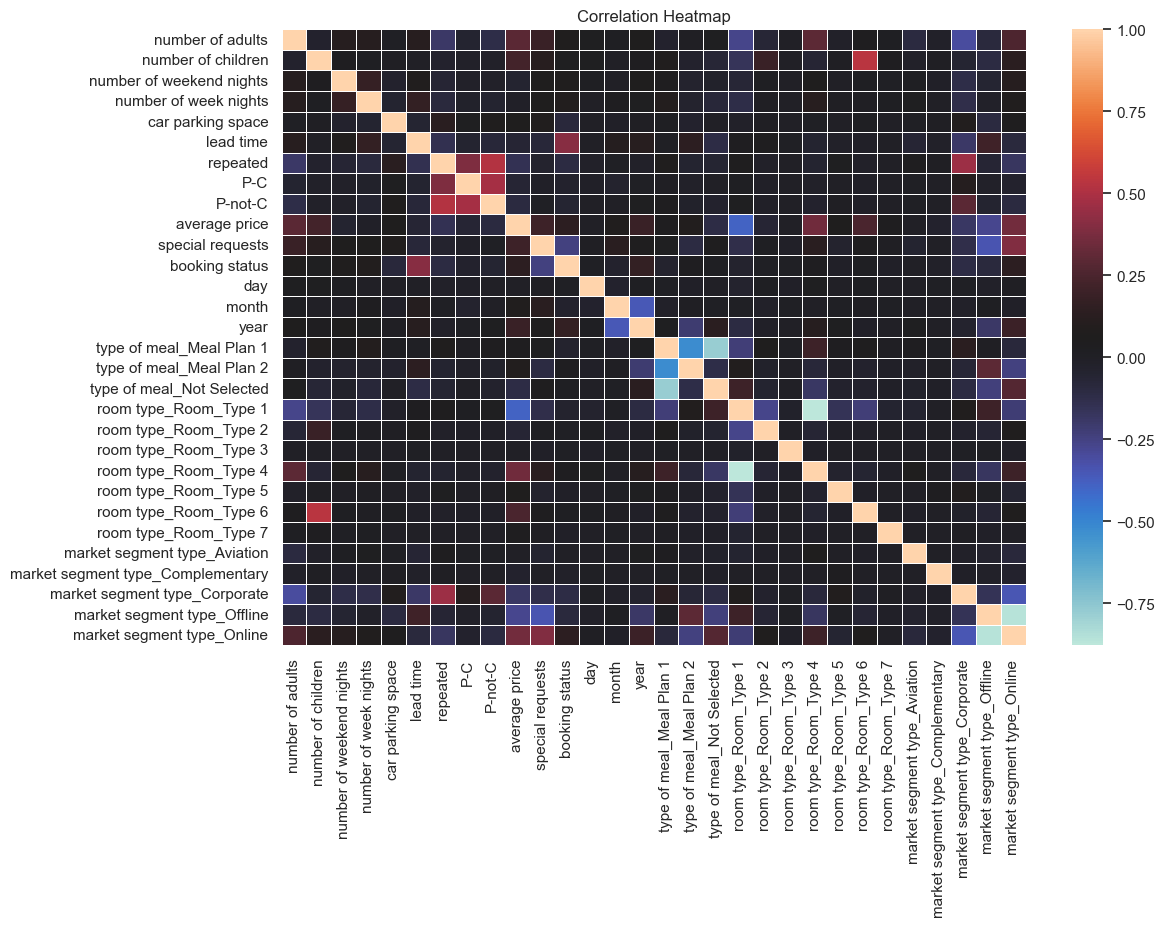

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(booking.corr(), cmap="icefire", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
features = booking.drop(["booking status"], axis=1)
target = booking["booking status"]

k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

lead time: 6755.25
special requests: 2136.14
year: 952.07
market segment type_Online: 646.78
average price: 614.84
market segment type_Corporate: 414.32
repeated: 343.90
market segment type_Offline: 250.21
number of week nights: 248.88
car parking space: 216.60


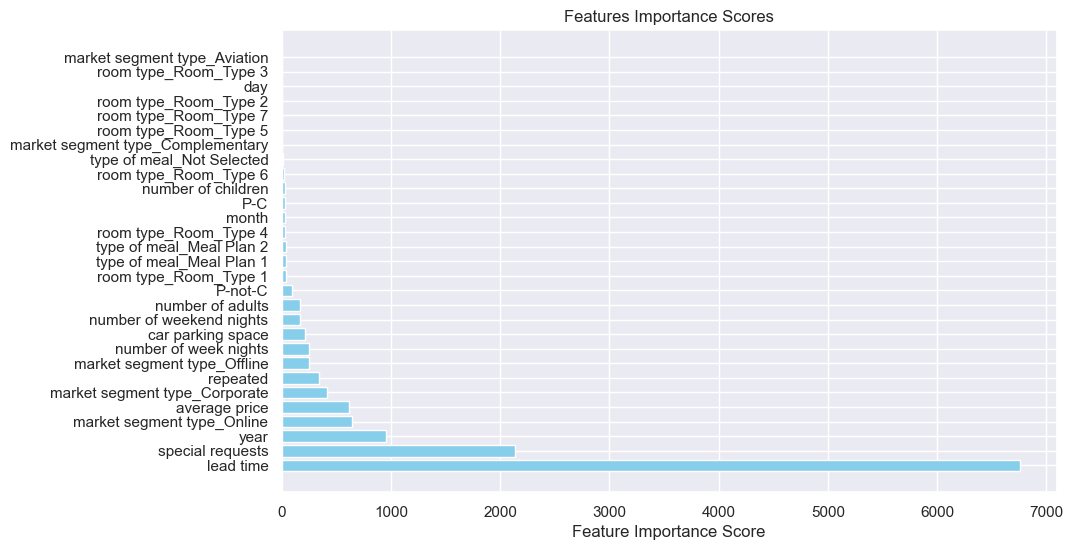

In [20]:
feature_names, feature_scores = zip(*sorted_feature_info[:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

In [21]:
selected_features_df = features.iloc[:, selected_features_indices]
selected_features_df.head()

,number of week nights,car parking space,lead time,repeated,average price,special requests,year,market segment type_Corporate,market segment type_Offline,market segment type_Online
1,5,0,224,0,88,0,2015,0,1,0
2,3,0,5,0,107,1,2018,0,0,1
3,3,0,1,0,50,0,2018,0,0,1
4,2,0,211,0,100,1,2017,0,0,1
5,2,0,48,0,77,0,2018,0,0,1


In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=5
)

In [25]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

scores = {}

import warnings
warnings.filterwarnings('ignore')


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.7975161925067871
Accuracy: 0.79
---------------------------------------------------------
Confusion Matrix: 
[[4113  464]
 [ 910 1176]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4577
           1       0.72      0.56      0.63      2086

    accuracy                           0.79      6663
   macro avg       0.77      0.73      0.74      6663
weighted avg       0.79      0.79      0.79      6663



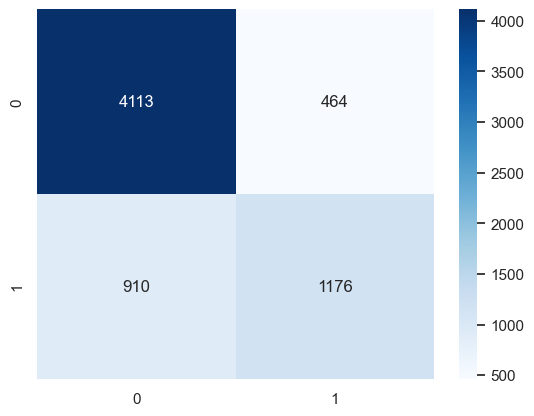

In [62]:


log_reg = LogisticRegression()

params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(log_reg, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Logistic Regression"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


Best Parameters: {'n_neighbors': 2}
Best Score: 0.8175917252655213
Accuracy: 0.83
---------------------------------------------------------
Confusion Matrix: 
[[4343  234]
 [ 907 1179]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4577
           1       0.83      0.57      0.67      2086

    accuracy                           0.83      6663
   macro avg       0.83      0.76      0.78      6663
weighted avg       0.83      0.83      0.82      6663



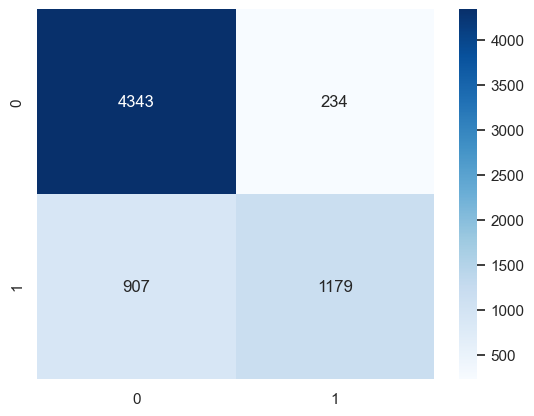

In [63]:
knn = KNeighborsClassifier()

params = {"n_neighbors": np.arange(1, 10)}

grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["KNN"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 15}
Best Score: 0.859582122951446
Accuracy: 0.86
---------------------------------------------------------
Confusion Matrix: 
[[4182  395]
 [ 540 1546]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4577
           1       0.80      0.74      0.77      2086

    accuracy                           0.86      6663
   macro avg       0.84      0.83      0.83      6663
weighted avg       0.86      0.86      0.86      6663



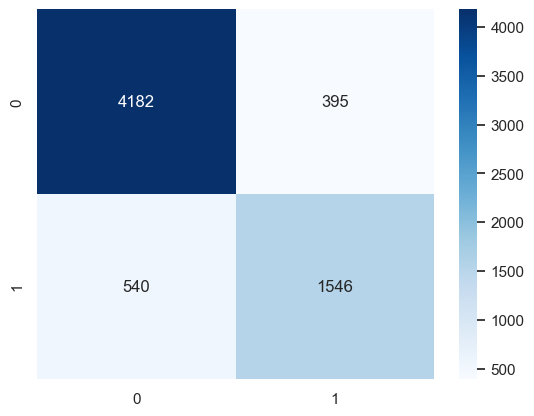

In [65]:
dt = DecisionTreeClassifier()

params = {"max_depth": np.arange(0, 30, 5), "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Decision Tree"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

In [66]:
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

Logistic Regression: 0.7938
KNN: 0.8288
Decision Tree: 0.8597
